## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_1/solution.ipynb).

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#database values
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu_df = pd.read_sql_query('select * from useducation',con=engine)
# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
#remove poorly reporting jurisdictions
def remove_nonstate(df):
    df = df[df.ENROLL.notna()]
    return df

usedu_stateonly_df = remove_nonstate(usedu_df)


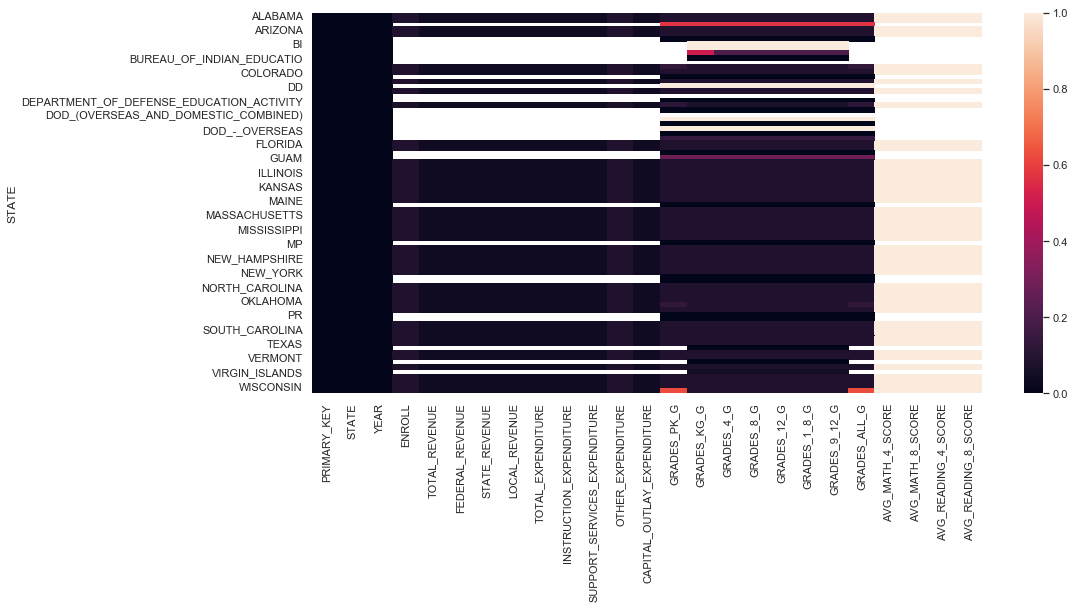

In [8]:
#state groups to see where missing value are and plot
def plot_nulls(datasource):
    datasource = datasource.groupby('STATE').apply(lambda x: x.isna().sum() / x.count())#.transpose()
    sns.set(style="whitegrid", palette="pastel")
    f2, ax2 = plt.subplots(figsize=(15, 7))
    ax2 = sns.heatmap(datasource, vmin=0, vmax=1)
plot_nulls(usedu_df) 

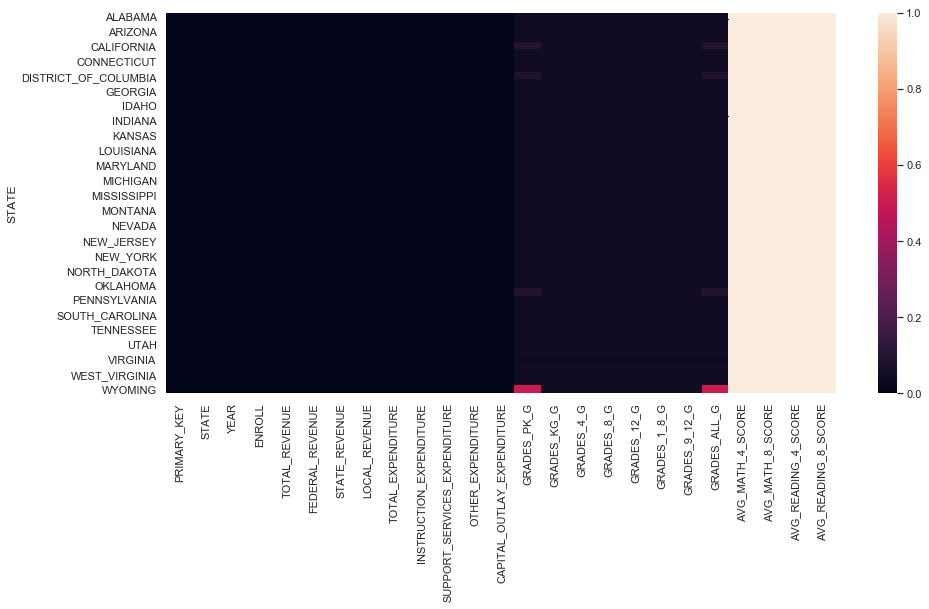

In [9]:
plot_nulls(usedu_stateonly_df)

In [14]:
usedu_stateonly_df = usedu_stateonly_df.sort_values(by=["YEAR"]).groupby('STATE').apply(lambda x: x.interpolate())

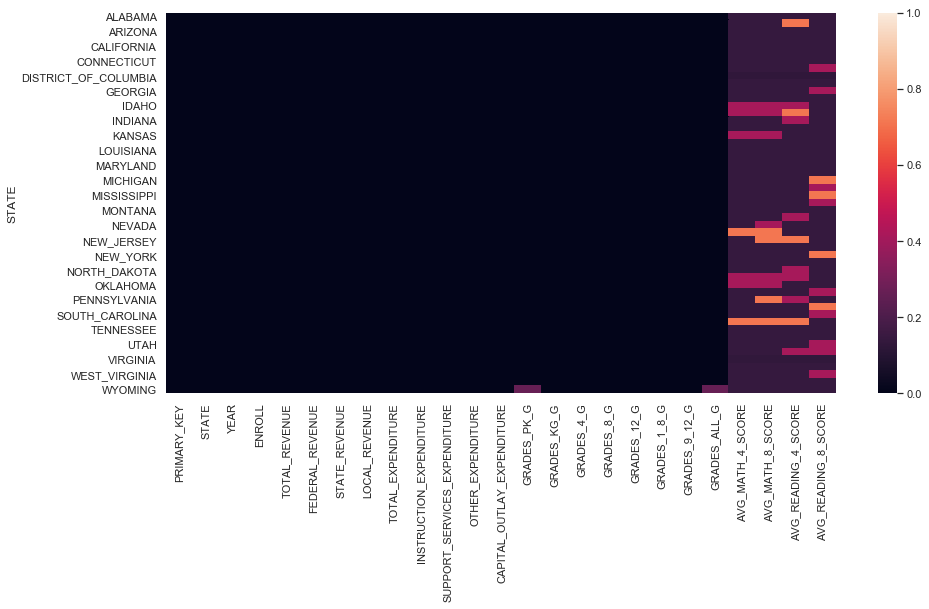

In [15]:
plot_nulls(usedu_stateonly_df)

In [16]:
usedu_stateonly_df[usedu_stateonly_df.isna().any(axis=1)]

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
89,1993_OKLAHOMA,OKLAHOMA,1993,312817.0,1436505.0,99809.0,802783.0,533913.0,1428916.0,726475.0,...,48242.0,46153.0,34744.0,389548.0,162511.0,557515.0,NaN,NaN,NaN,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
53,1993_ALASKA,ALASKA,1993,121156.0,1191398.0,176150.0,775829.0,239419.0,1126398.0,494917.0,...,10156.0,9160.0,6975.0,80485.0,32347.0,115619.0,NaN,NaN,NaN,NaN
54,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,461398.0,182737.0,647299.0,NaN,NaN,NaN,NaN
55,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,280280.0,125801.0,407329.0,NaN,NaN,NaN,NaN
56,1993_CALIFORNIA,CALIFORNIA,1993,5129788.0,28043338.0,2151157.0,17064146.0,8828035.0,28110986.0,15281147.0,...,420233.0,380223.0,277271.0,3328627.0,1393530.0,4782111.0,NaN,NaN,NaN,NaN
57,1993_COLORADO,COLORADO,1993,539538.0,3058326.0,147793.0,1242337.0,1668196.0,3028305.0,1537714.0,...,50807.0,47665.0,34770.0,403871.0,164260.0,575380.0,NaN,NaN,NaN,NaN
58,1993_CONNECTICUT,CONNECTICUT,1993,471918.0,4064158.0,149204.0,1433539.0,2481415.0,4079943.0,2302852.0,...,39093.0,34662.0,27979.0,310022.0,127655.0,443893.0,NaN,NaN,NaN,NaN
59,1993_DELAWARE,DELAWARE,1993,104355.0,683954.0,44497.0,443250.0,196207.0,694534.0,394680.0,...,8285.0,8265.0,5882.0,67899.0,28930.0,97394.0,NaN,NaN,NaN,NaN
76,1993_MINNESOTA,MINNESOTA,1993,781566.0,4862635.0,213724.0,2284106.0,2364805.0,5290504.0,2756415.0,...,63194.0,63105.0,54642.0,507979.0,233253.0,747888.0,NaN,NaN,NaN,NaN


In [20]:
#replace remaining nulls with state mean for column
def statecolmean(df):
    for column in df.columns:
        try:
            df[column] = df.groupby('STATE')[column].transform(lambda x: x.fillna(x.mean()))
        except TypeError:
            pass
statecolmean(usedu_stateonly_df)    

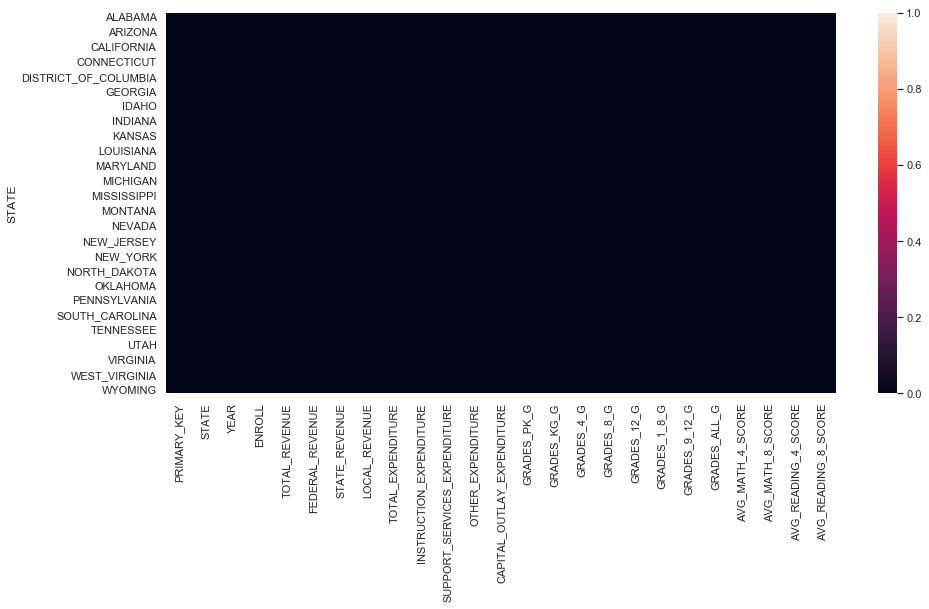

In [21]:
plot_nulls(usedu_stateonly_df)